In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

data = pd.read_excel('7.Kmeans.xlsx')
print(data)
x_values = data['x'].tolist()
y_values = data['y'].tolist()
X = [[x, y] for x, y in zip(x_values, y_values)]
print('X=' ,X)


def distance(point1, point2):
    return sum([(x - y) ** 2 for x, y in zip(point1, point2)])
def assign_labels(X, centroids):
    labels = []
    for point in X:
        distances = [distance(point, centroid) for centroid in centroids]
        cluster_label = distances.index(min(distances))
        labels.append(cluster_label)
    return labels
def update_centroids(X, labels, k):
    centroids = []
    for i in range(k):
        cluster_points = [X[j] for j in range(len(X)) if labels[j] == i]
        centroid = [sum(coord) / len(cluster_points) for coord in zip(*cluster_points)]
        centroids.append(centroid)
    return centroids
def kmeans(X, k, max_iterations=100):    
    centroids = X[:k]
    print('Inital centroids')
    print(centroids)    
    for _ in range(max_iterations):
        # Assign each data point to the nearest centroid
        labels = assign_labels(X, centroids)        
        # Update centroids based on the mean of the assigned data points
        new_centroids = update_centroids(X, labels, k)
        print(new_centroids)        
        # If centroids have not changed, convergence reached
        if centroids == new_centroids:
            break       
        centroids = new_centroids    
    return labels, centroids
k = int(input("Enter the number of cluster(k): "))
labels, centroids = kmeans(X, k)
labels = [label + 1 for label in labels]
print('Labels for clustereing')
print(labels)
clusters = [[] for _ in range(k)]
for i, point in enumerate(X):
    cluster_label = labels[i]
    clusters[cluster_label - 1].append(point)
# Print the clusters with their data points
for i, cluster in enumerate(clusters):
    print("Cluster", i + 1, ":", cluster)  
print("Final centroids:", centroids)

    x   y
0   9   3
1  15   6
2  15  12
3  21  12
4  24  16
5  30  20
6  35  24
X= [[9, 3], [15, 6], [15, 12], [21, 12], [24, 16], [30, 20], [35, 24]]
Inital centroids
[[9, 3], [15, 6]]
[[9.0, 3.0], [23.333333333333332, 15.0]]
[[12.0, 4.5], [25.0, 16.8]]
[[13.0, 7.0], [27.5, 18.0]]
[[13.0, 7.0], [27.5, 18.0]]
Labels for clustereing
[1, 1, 1, 2, 2, 2, 2]
Cluster 1 : [[9, 3], [15, 6], [15, 12]]
Cluster 2 : [[21, 12], [24, 16], [30, 20], [35, 24]]
Final centroids: [[13.0, 7.0], [27.5, 18.0]]


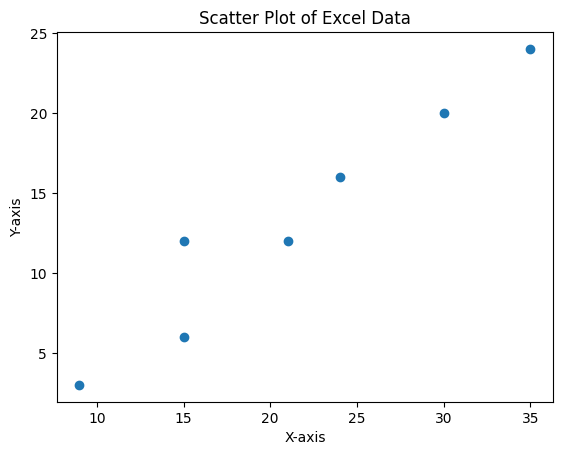

In [4]:
x = data.iloc[:, 0]
y = data.iloc[:, 1]

# Create a scatter plot
plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot of Excel Data')
plt.show()

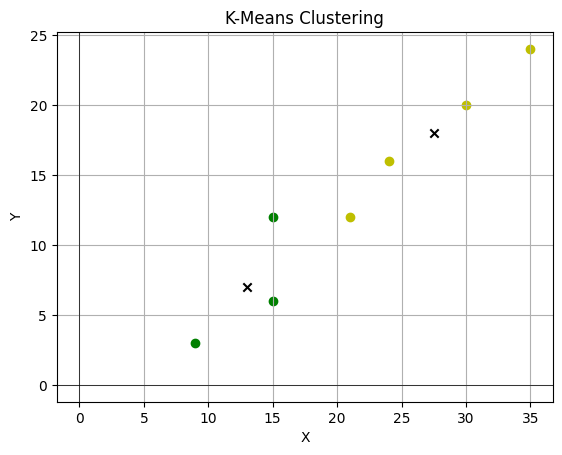

In [5]:

colors = ['r', 'g', 'y', 'c', 'm', 'b']
for i, point in enumerate(X):
    plt.scatter(point[0], point[1], c=colors[labels[i]])

for centroid in centroids:
    plt.scatter(centroid[0], centroid[1], c='black', marker='x')    
plt.grid(True)
#plt.xlim(min(x) - 10, max(x) + 10)
#plt.ylim(min(y) - 10, max(y) + 10)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('K-Means Clustering')
plt.show()